In [1]:
using LightGraphs, Distributions

In [2]:
dene = Exponential()
trans_rate(b, con, energ, grafo) = [exp(-b*energ[j])/con for i in vertices(grafo), j in vertices(grafo)]
ipr(eigenvector) = sum(eigenvector.^4)/(sum(eigenvector.^2))^2.

ipr (generic function with 1 method)

In [17]:
c = 5
n_vertices = 1000
ensemble = 100

T = 0.1:0.25:6.
I2 = zeros(ensemble);
t2 = zeros(length(T));

In [28]:
T = 2.5
beta = 1/T;

In [29]:
L = random_regular_graph(n_vertices,c)
adj = adjacency_matrix(L)
energias = rand(dene,nv(L))
rates = trans_rate(beta, c, energias, L);
M = rates.*adj;
for i in vertices(L)
    M[i,i] = -sum(M[:,i])
end
p_eq =  exp.(beta*energias)
p_eq /= sum(p_eq)
p_inv = p_eq.^(-1/2)
p_dir = p_eq.^(1/2)
Ms = diagm(p_inv)*M*diagm(p_dir)
eig_values = sort(eigvals(Ms))
eigens = eig_values
spacing = [eig_values[i+1] - eig_values[i] for i in 1:length(eig_values) - 1]
mean_space = mean(spacing)
spacing /= mean_space
statistics = spacing;

for k in 1:ensemble-1
    L = random_regular_graph(n_vertices,c)
    adj = adjacency_matrix(L)
    energias = rand(dene,nv(L))
    rates = trans_rate(beta, c, energias, L);
    M = rates.*adj;
    for i in vertices(L)
        M[i,i] = -sum(M[:,i])
    end
    p_eq =  exp.(beta*energias)
    p_eq /= sum(p_eq)
    p_inv = p_eq.^(-1/2)
    p_dir = p_eq.^(1/2)
    Ms = diagm(p_inv)*M*diagm(p_dir)
    eig_values = sort(eigvals(Ms))
    eigens = vcat(eigens, eig_values)
    spacing = [eig_values[i+1] - eig_values[i] for i in 1:length(eig_values) - 1]
    mean_space = mean(spacing)
    spacing /= mean_space
    statistics = vcat(statistics,spacing)
end

In [33]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

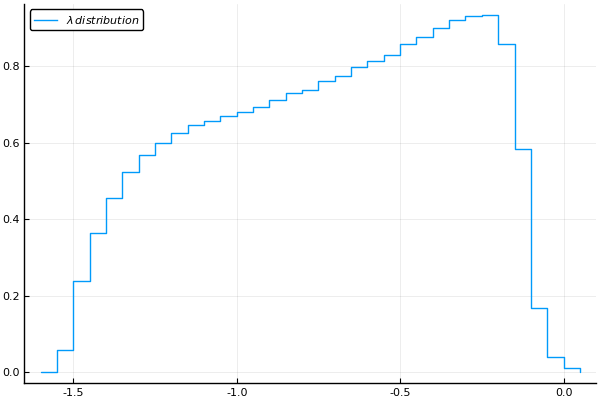

In [34]:
stephist(eigens, bins = 50, normed = true, label = L"\lambda \, distribution")

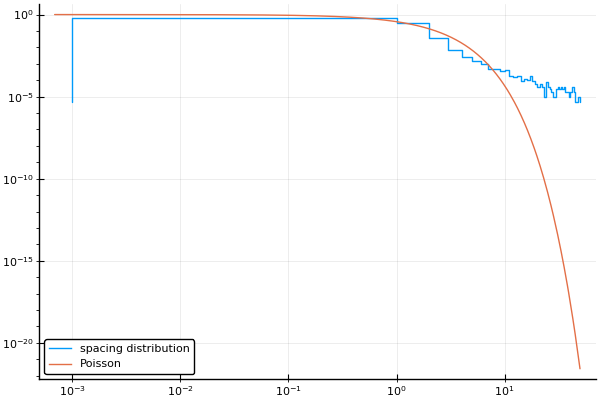

In [35]:
stephist(statistics, bins = 50, normed = true, label = "spacing distribution", 
    xscale = :log10, yscale = :log10)
plot!(sort(statistics), exp.(-sort(statistics)), label = "Poisson")